In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv(r'Data\StudentsPerformance.csv')

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Data Understanding

In [6]:
df.shape

(1000, 8)

In [7]:
# Check Null NA = .isna()
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 8 columns):

 #   Column                       Non-Null Count  Dtype 

---  ------                       --------------  ----- 

 0   gender                       1000 non-null   object

 1   race/ethnicity               1000 non-null   object

 2   parental level of education  1000 non-null   object

 3   lunch                        1000 non-null   object

 4   test preparation course      1000 non-null   object

 5   math score                   1000 non-null   int64 

 6   reading score                1000 non-null   int64 

 7   writing score                1000 non-null   int64 

dtypes: int64(3), object(5)

memory usage: 62.6+ KB


In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Check Desciptive Stat
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# Check NO. of unique
df.nunique() # nunique() = NO. of unique /// unique() = name of unique

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
# Count NO and Category Column

NO_feature = [feature for feature in df.columns if df[feature].dtype != 'O' ]
Cate_feature = [feature for feature in df.columns if df[feature].dtype == 'O' ]

print('--- Numberical Feature ---\n{} Features, Name {}'.format(len(NO_feature), NO_feature))
print('--- Categorical Feature ---\n{} Features, Name {}'.format(len(Cate_feature), Cate_feature))

--- Numberical Feature ---

3 Features, Name ['math score', 'reading score', 'writing score']

--- Categorical Feature ---

5 Features, Name ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
# Check Unique Name

print("--- Gender ---\n",df['gender'].unique())
print("--- Race/ethnicity ---\n",df['race/ethnicity'].unique())
print("--- Parental level of education ---\n",df['parental level of education'].unique())
print("--- Lunch ---\n",df['lunch'].unique())
print("--- Test preparation course ---\n",df['test preparation course'].unique())


# cat_entries = list(map(lambda col: df[col].nunique(), cat_data))
# d = dict(zip(cat_data,cat_entries))

--- Gender ---

 ['female' 'male']

--- Race/ethnicity ---

 ['group B' 'group C' 'group A' 'group D' 'group E']

--- Parental level of education ---

 ["bachelor's degree" 'some college' "master's degree" "associate's degree"

 'high school' 'some high school']

--- Lunch ---

 ['standard' 'free/reduced']

--- Test preparation course ---

 ['none' 'completed']


Feature Engineering

In [16]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


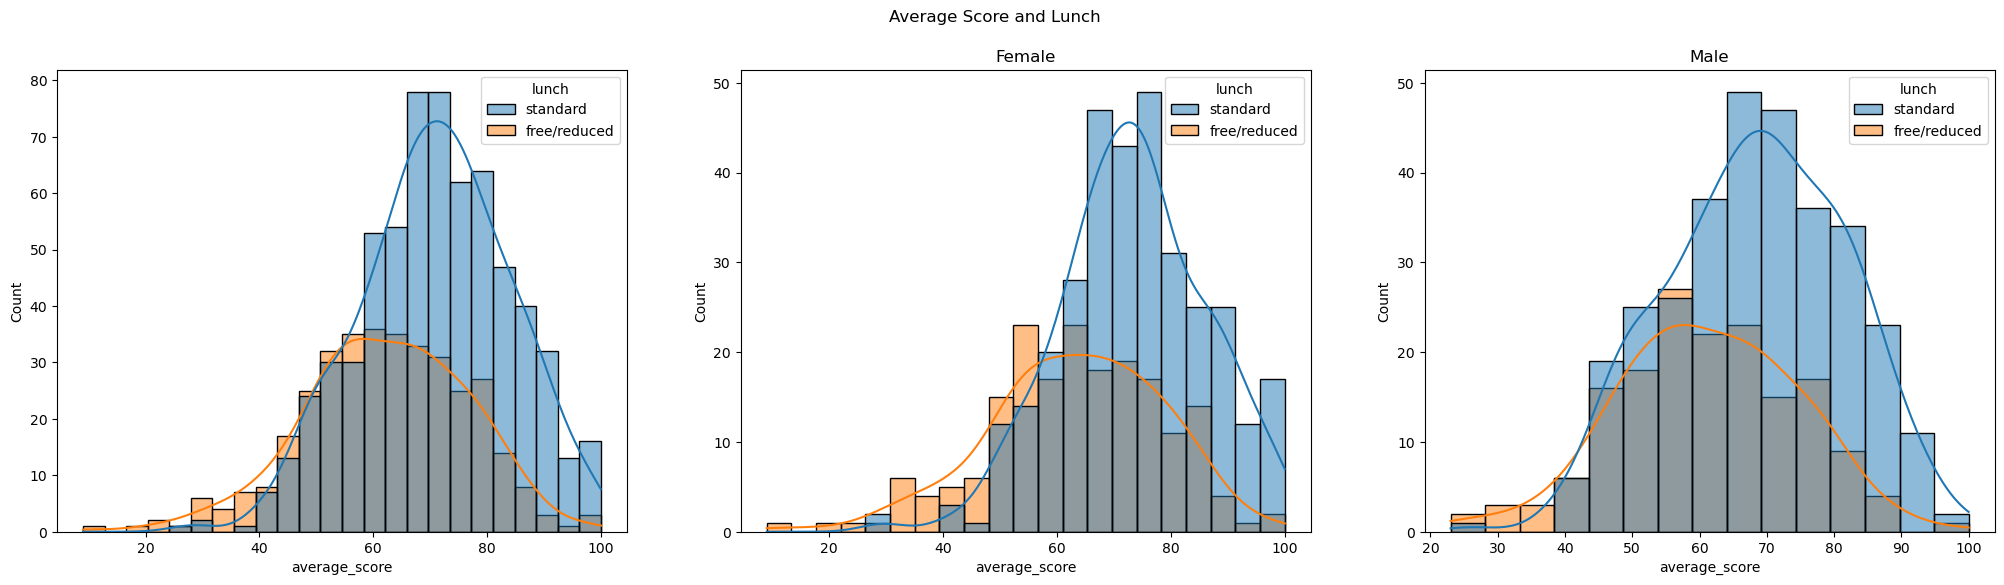

In [17]:
# Average score and Lunch
plt.subplots(1,3,figsize=(25,6))
lunch_hue_order=['standard', 'free/reduced']

plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch',hue_order=lunch_hue_order)

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch',hue_order=lunch_hue_order)
plt.title("Female")

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch',hue_order=lunch_hue_order)
plt.title("Male")

plt.suptitle('Average Score and Lunch')
plt.show()

# plt.subplot(133) = (Position , NO. of total plot , NO. of plot)

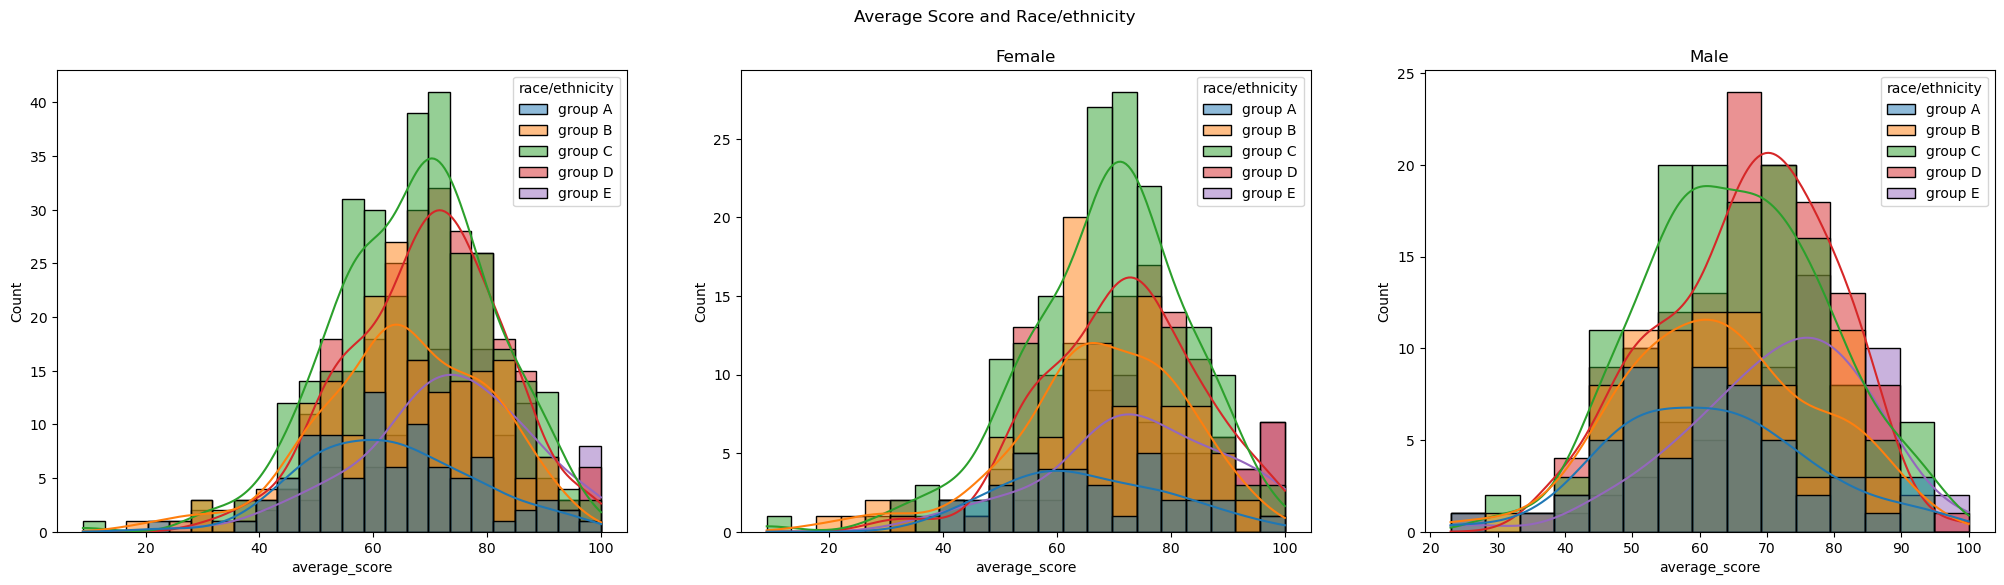

In [18]:
# Average Score and Race/ethnicity
plt.subplots(1,3,figsize=(25,6))
race__hue_order=['group A','group B','group C','group D','group E']

plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity',hue_order=race__hue_order)

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity',hue_order=race__hue_order)
plt.title("Female")

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity',hue_order=race__hue_order)
plt.title("Male")

plt.suptitle('Average Score and Race/ethnicity')
plt.show()

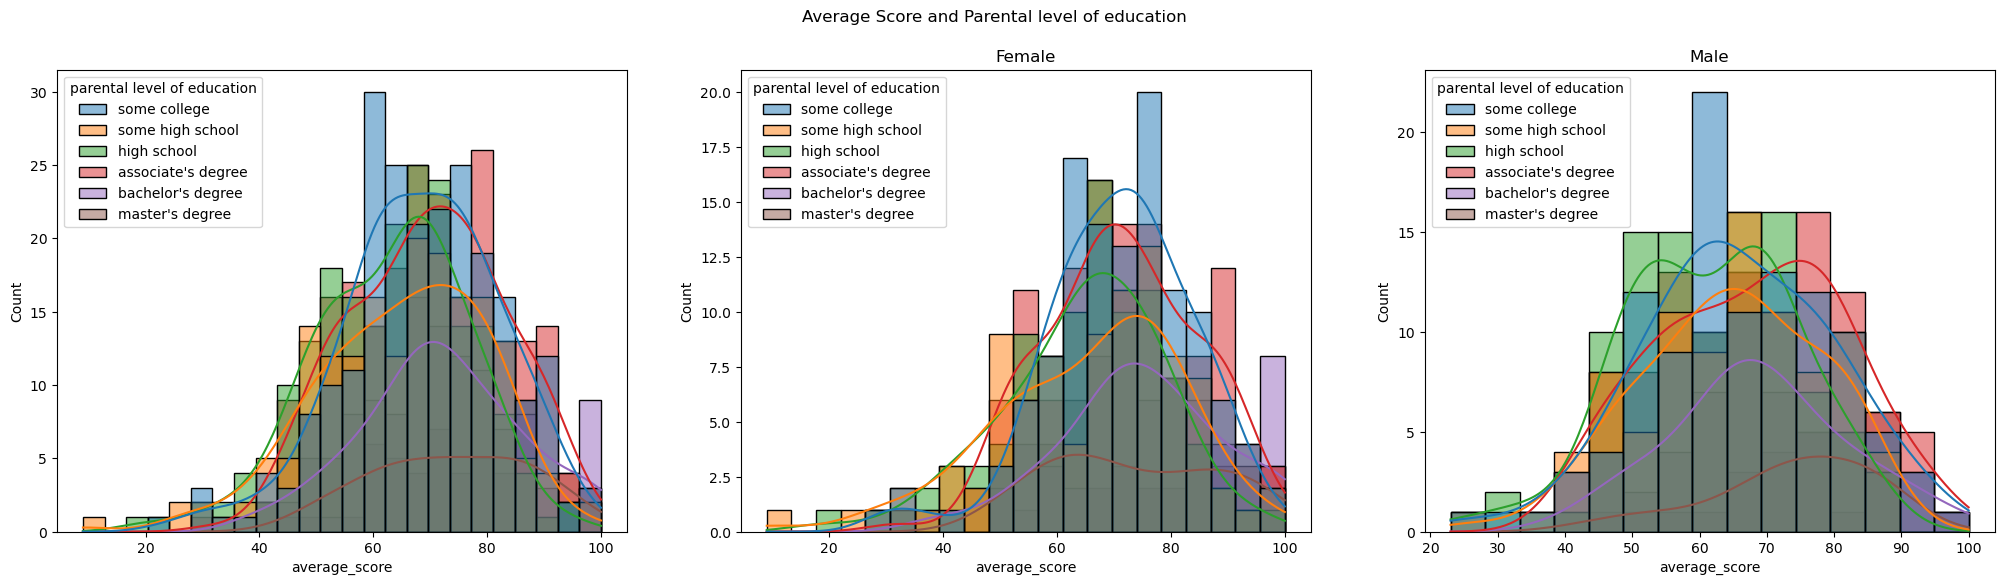

In [19]:
# Average score and Parental level of education
plt.subplots(1,3,figsize=(25,6))
parent_hue_order=['some college','some high school', 'high school',"associate's degree", "bachelor's degree","master's degree"]

plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education',hue_order=parent_hue_order)

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education',hue_order=parent_hue_order)
plt.title("Female")

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education',hue_order=parent_hue_order)
plt.title("Male")

plt.suptitle('Average Score and Parental level of education')
plt.show()


Text(0.5, 1.0, 'Parental level of education Distribution')

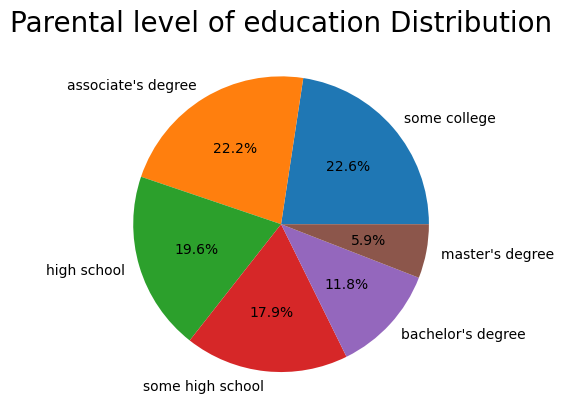

In [20]:
plt.pie(x=df['parental level of education'].value_counts(), labels=df['parental level of education'].value_counts().index,
        explode=[0, 0, 0, 0, 0, 0], autopct='%1.1f%%', shadow=False)
plt.title('Parental level of education Distribution', fontsize=20)

Hypothesis Testing

In [21]:
from scipy.stats import shapiro, kruskal, pearsonr, ttest_ind

# shapiro test normal distribution
# kruskal test significant differences in means among more than two groups
# pearsonr test correlation coefficient measures the linear relationship between two datasets.
# ttest_ind test category and num


In [22]:
# Groupby unique function that return sample size and mean
def groupby_getmean(data, feature):
    value = data[feature].value_counts()
    line = '-'*40
    feature_group = df.groupby(feature)
    feature_mean = feature_group['average_score'].mean()
    return value, line, feature_mean


In [23]:
parent_group = groupby_getmean(df, 'parental level of education')
parent_group

(parental level of education
 some college          226
 associate's degree    222
 high school           196
 some high school      179
 bachelor's degree     118
 master's degree        59
 Name: count, dtype: int64,
 '----------------------------------------',
 parental level of education
 associate's degree    69.569069
 bachelor's degree     71.923729
 high school           63.096939
 master's degree       73.598870
 some college          68.476401
 some high school      65.108007
 Name: average_score, dtype: float64)

In [24]:
gender_group = groupby_getmean(df, 'gender')
gender_group

(gender
 female    518
 male      482
 Name: count, dtype: int64,
 '----------------------------------------',
 gender
 female    69.569498
 male      65.837483
 Name: average_score, dtype: float64)

In [25]:
lunch_group = groupby_getmean(df, 'lunch')
lunch_group

(lunch
 standard        645
 free/reduced    355
 Name: count, dtype: int64,
 '----------------------------------------',
 lunch
 free/reduced    62.199061
 standard        70.837209
 Name: average_score, dtype: float64)

In [26]:
pre_test_group = groupby_getmean(df, 'test preparation course')
pre_test_group

(test preparation course
 none         642
 completed    358
 Name: count, dtype: int64,
 '----------------------------------------',
 test preparation course
 completed    72.669460
 none         65.038941
 Name: average_score, dtype: float64)

In [27]:
male_scores = df[df['gender'] == 'male']['average_score']
female_scores = df[df['gender'] == 'female']['average_score']

free_scores = df[df['lunch'] == 'free/reduced']['average_score']
standard_scores = df[df['lunch'] == 'standard']['average_score']

pre_scores = df[df['test preparation course'] == 'completed']['average_score']
nopre_scores = df[df['test preparation course'] == 'none']['average_score']


In [28]:
def t_test(group, groupA, groupB):
    tt_test,tp_val = ttest_ind(groupA, groupB, equal_var = False) # equal_var : False for sample size not equal
    print(f'T-Test independent : group of {group}')

    if tp_val < 0.05:
        print(f"The p-value is {tp_val} which is less than 0.05")
        print(f'Reject the Null Hypothesis. There is a significant difference in average test score between {group} types.') 
    else:
        print(f"The p-value is {tp_val} which is greater than 0.05")
        print(f'Fail to Reject the Null Hypothesis. There is no significant differences in average test score between {group} types.')


# Gender T-Test
t_test(group = 'gender', groupA = male_scores, groupB = female_scores )


T-Test independent : group of gender

The p-value is 3.1861975638752864e-05 which is less than 0.05

Reject the Null Hypothesis. There is a significant difference in average test score between gender types.


In [29]:
# Lunch T-Test
t_test(group = 'lunch', groupA = free_scores, groupB = standard_scores )

T-Test independent : group of lunch

The p-value is 1.582969042730339e-19 which is less than 0.05

Reject the Null Hypothesis. There is a significant difference in average test score between lunch types.


In [30]:
t_test(group = 'test preparation course', groupA = pre_scores, groupB = nopre_scores)

T-Test independent : group of test preparation course

The p-value is 4.426725271318694e-17 which is less than 0.05

Reject the Null Hypothesis. There is a significant difference in average test score between test preparation course types.


In [31]:
def shipiro_test(data, group, target):

    # group
    groupA = data[data[group] == "some college"][target]
    groupB = data[data[group] == "some high school"][target]
    groupC = data[data[group] == "high school"][target]
    groupD = data[data[group] == "associate's degree"][target]
    groupE = data[data[group] == "bachelor's degree"][target]
    groupF = data[data[group] == "master's degree"][target]

    # Shapiro to test normal distribution
    norA = shapiro(groupA)[1] < 0.05
    norB = shapiro(groupB)[1] < 0.05
    norC = shapiro(groupC)[1] < 0.05
    norD = shapiro(groupD)[1] < 0.05
    norE = shapiro(groupE)[1] < 0.05
    norF = shapiro(groupF)[1] < 0.05

    list_nor = (norA,norB,norC,norD,norE,norF)
    print("Shapiro Test : group of parental education's level")
    for key in list_nor:
        if key == False:
            print(key,'-- Normal')
        else:
            print(key,'-- Not Normal')
    
    print('-'*50)

    # Kruskal to test significant differences in means among parental level of education groups 
    print("Kruskal Test : group of parental education's level")
    h_statistic, Kp_value = kruskal(groupA, groupB, groupC, groupD, groupE)
    
    if Kp_value < 0.05:
        print(f"The p-value is {Kp_value} which is less than 0.05")
        print(f"Reject the Null Hypothesis. There is significant differences in average test score among the {group} types.")
    else:
        print(f"The p-value is {Kp_value} which is greater than or equal to 0.05")
        print(f"Fail to Reject the Null Hypothesis. There is no significant differences in average test score among the {group} types.")

shipiro_test(data = df, group = 'parental level of education', target = "average_score")

''' four normal distribution out of five and not equal sample size. 
    Kruskal-Wallis does not assume normality and is suitable for unequal sample sizes.'''


Shapiro Test : group of parental education's level

False -- Normal

True -- Not Normal

False -- Normal

False -- Normal

False -- Normal

False -- Normal

--------------------------------------------------

Kruskal Test : group of parental education's level

The p-value is 3.383676629900927e-07 which is less than 0.05

Reject the Null Hypothesis. There is significant differences in average test score among the parental level of education types.


' four normal distribution out of five and not equal sample size. \n    Kruskal-Wallis does not assume normality and is suitable for unequal sample sizes.'

In [32]:
# The PearsonR correlation coefficient measures the linear relationship between two datasets.

math_read_stat,math_read_pval = pearsonr(df['math score'],df['reading score'])
write_read_stat,write_read_pval = pearsonr(df['writing score'],df['reading score'])
math_write_stat,math_write_pval = pearsonr(df['math score'],df['writing score'])

print('PearsonR Test : correlation between score')
print('')
def hypo_testing(pval):
    if pval < 0.05:
        result = print (f'P-value is {pval} less that 0.05.\nReject Null Hypothesis, there is significant correlation between the variables.')
    else:
        result = print (f'P-value is {pval} greater that 0.05.\nFail to Reject Null Hypothesis, there is no significant correlation between the variables.')
    return result

print('Math and Reading score')
hypo_testing(math_read_pval)
print('')

print('Writing and Reading score')
hypo_testing(write_read_pval)
print('')

print('Math and Writing score')
hypo_testing(math_write_pval)

''' Null Hypothesis : there is no significant correlation between the variables.
    Reject Null Hypothesis mean there is significant correlation between the variables.'''

PearsonR Test : correlation between score



Math and Reading score

P-value is 1.7877531099061487e-241 less that 0.05.

Reject Null Hypothesis, there is significant correlation between the variables.



Writing and Reading score

P-value is 0.0 less that 0.05.

Reject Null Hypothesis, there is significant correlation between the variables.



Math and Writing score

P-value is 3.3760270425690023e-226 less that 0.05.

Reject Null Hypothesis, there is significant correlation between the variables.


' Null Hypothesis : there is no significant correlation between the variables.\n    Reject Null Hypothesis mean there is significant correlation between the variables.'